In [ ]:
# Install required packages if needed
import sys
import subprocess

def install_package(package):
    try:
        __import__(package)
        print(f"{package} is already installed.")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} has been installed.")

# Install necessary packages
install_package("pandas")
install_package("numpy")
install_package("matplotlib")
install_package("seaborn")


In [ ]:
# Exploratory Data Analysis (EDA) on Retail Sales Data

In this notebook, we'll analyze retail sales data to uncover patterns, trends, and insights that can help the business make informed decisions.


In [ ]:
## 1. Data Loading and Initial Exploration


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    # Set visualization style
    sns.set_theme(style="whitegrid")
    sns.set_palette('viridis')
    print("Seaborn imported successfully!")
except ImportError:
    print("WARNING: Seaborn not available. Using matplotlib for visualizations.")
    # Define a minimal function to mimic barplot
    def barplot(**kwargs):
        data = kwargs.get('data')
        x = kwargs.get('x')
        y = kwargs.get('y')
        hue = kwargs.get('hue')
        
        if hue is not None:
            # Group by both x and hue
            groups = data.groupby([x, hue])[y].mean().unstack()
            groups.plot(kind='bar')
        else:
            # Simple bar plot
            data.plot(x=x, y=y, kind='bar')
    
    # Add to namespace to mimic sns
    class Sns:
        @staticmethod
        def barplot(**kwargs):
            return barplot(**kwargs)
        
        @staticmethod
        def heatmap(data, **kwargs):
            plt.imshow(data, cmap='viridis')
            plt.colorbar()
        
        @staticmethod
        def lineplot(**kwargs):
            data = kwargs.get('data')
            x = kwargs.get('x')
            y = kwargs.get('y')
            data.plot(x=x, y=y)
            
        @staticmethod
        def scatterplot(**kwargs):
            data = kwargs.get('data')
            x = kwargs.get('x')
            y = kwargs.get('y')
            plt.scatter(data[x], data[y])
    
    # Assign the custom class to sns
    sns = Sns()

from datetime import datetime

# Display all columns
pd.set_option('display.max_columns', None)


Seaborn imported successfully!


In [6]:
# Test visualization tools
try:
    import seaborn as sns
    print(f"Seaborn is available. Let's continue with the analysis.")
except ImportError:
    print("Using our fallback visualization functions.")


Seaborn is available. Let's continue with the analysis.


In [7]:
# Load the retail sales dataset
sales_df = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows
sales_df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
# Let's also load the menu dataset, which appears to contain product information
menu_df = pd.read_csv('menu.csv')

# Display the first few rows
menu_df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [9]:
# Check the shape of both datasets
print(f"Sales dataset shape: {sales_df.shape}")
print(f"Menu dataset shape: {menu_df.shape}")


Sales dataset shape: (1000, 9)
Menu dataset shape: (260, 24)


In [10]:
# Get information about the sales dataset
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
# Summary statistics for numerical columns
sales_df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
## 2. Data Cleaning and Preprocessing


In [12]:
# Check for missing values
print("Missing values in sales dataset:")
print(sales_df.isnull().sum())

print("\nMissing values in menu dataset:")
print(menu_df.isnull().sum())


Missing values in sales dataset:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing values in menu dataset:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Valu

In [13]:
# Convert Date column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Extract useful date components
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day
sales_df['DayOfWeek'] = sales_df['Date'].dt.dayofweek
sales_df['Quarter'] = sales_df['Date'].dt.quarter

# Create month name column for easier understanding
sales_df['Month_Name'] = sales_df['Date'].dt.month_name()
sales_df['Day_Name'] = sales_df['Date'].dt.day_name()

# Display the updated dataframe
sales_df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Day,DayOfWeek,Quarter,Month_Name,Day_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,24,4,4,November,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,27,0,1,February,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,13,4,1,January,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,21,6,2,May,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,6,5,2,May,Saturday


In [ ]:
## 3. Descriptive Statistics Analysis


In [14]:
# Basic statistics for numerical columns
print("Mean values:")
print(f"Average Age: {sales_df['Age'].mean():.2f} years")
print(f"Average Quantity: {sales_df['Quantity'].mean():.2f} units")
print(f"Average Price per Unit: ${sales_df['Price per Unit'].mean():.2f}")
print(f"Average Total Amount: ${sales_df['Total Amount'].mean():.2f}")

print("\nMedian values:")
print(f"Median Age: {sales_df['Age'].median()} years")
print(f"Median Quantity: {sales_df['Quantity'].median()} units")
print(f"Median Price per Unit: ${sales_df['Price per Unit'].median()}")
print(f"Median Total Amount: ${sales_df['Total Amount'].median()}")

print("\nMode values:")
print(f"Most common Age: {sales_df['Age'].mode()[0]} years")
print(f"Most common Quantity: {sales_df['Quantity'].mode()[0]} units")
print(f"Most common Price per Unit: ${sales_df['Price per Unit'].mode()[0]}")


Mean values:
Average Age: 41.39 years
Average Quantity: 2.51 units
Average Price per Unit: $179.89
Average Total Amount: $456.00

Median values:
Median Age: 42.0 years
Median Quantity: 3.0 units
Median Price per Unit: $50.0
Median Total Amount: $135.0

Mode values:
Most common Age: 43 years
Most common Quantity: 4 units
Most common Price per Unit: $50


In [15]:
# Standard deviation for numerical columns
print("Standard Deviation:")
print(f"Age: {sales_df['Age'].std():.2f} years")
print(f"Quantity: {sales_df['Quantity'].std():.2f} units")
print(f"Price per Unit: ${sales_df['Price per Unit'].std():.2f}")
print(f"Total Amount: ${sales_df['Total Amount'].std():.2f}")


Standard Deviation:
Age: 13.68 years
Quantity: 1.13 units
Price per Unit: $189.68
Total Amount: $560.00


In [ ]:
## 4. Categorical Data Analysis


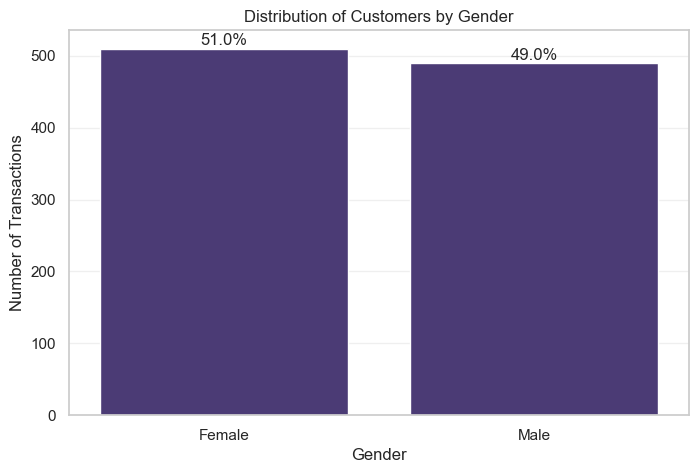

In [16]:
# Gender distribution
gender_counts = sales_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Count', data=gender_counts)
plt.title('Distribution of Customers by Gender')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
total = gender_counts['Count'].sum()
for i, count in enumerate(gender_counts['Count']):
    percentage = 100 * count / total
    plt.text(i, count + 5, f'{percentage:.1f}%', ha='center')

plt.show()


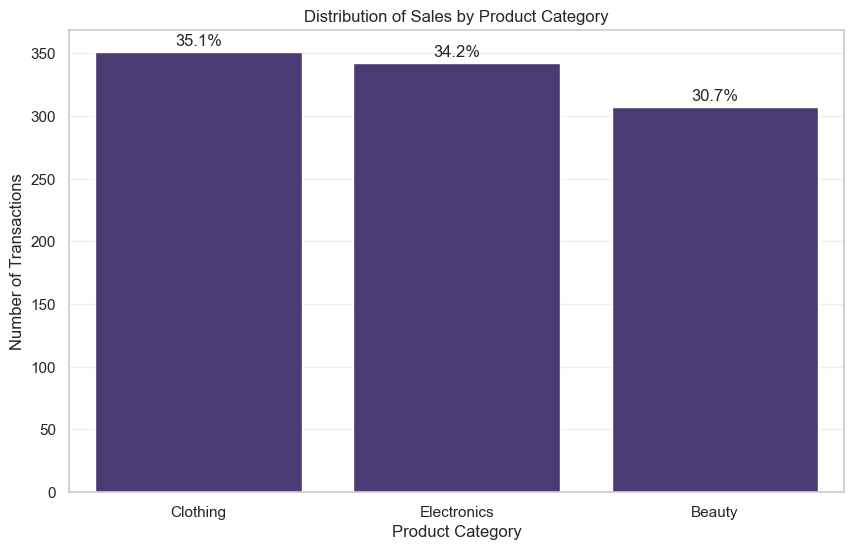

In [17]:
# Product category distribution
category_counts = sales_df['Product Category'].value_counts().reset_index()
category_counts.columns = ['Product Category', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Product Category', y='Count', data=category_counts)
plt.title('Distribution of Sales by Product Category')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
total = category_counts['Count'].sum()
for i, count in enumerate(category_counts['Count']):
    percentage = 100 * count / total
    plt.text(i, count + 5, f'{percentage:.1f}%', ha='center')

plt.show()


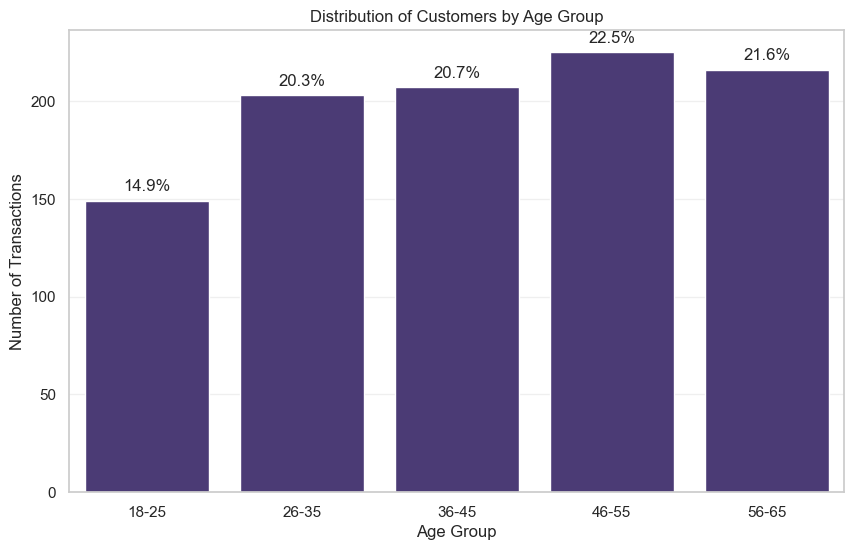

In [18]:
# Age group distribution
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
sales_df['Age Group'] = pd.cut(sales_df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = sales_df['Age Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Count', data=age_group_counts)
plt.title('Distribution of Customers by Age Group')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels
total = age_group_counts['Count'].sum()
for i, count in enumerate(age_group_counts['Count']):
    percentage = 100 * count / total
    plt.text(i, count + 5, f'{percentage:.1f}%', ha='center')

plt.show()


In [ ]:
## 5. Time Series Analysis


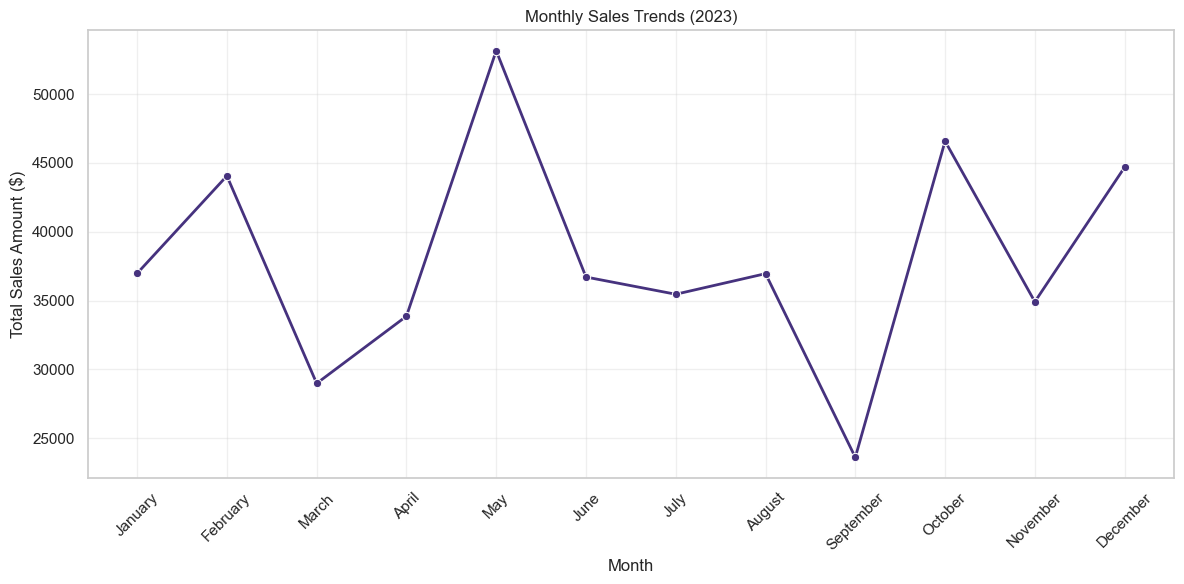

In [19]:
# Sales trends over time
monthly_sales = sales_df.groupby(['Month', 'Month_Name'])['Total Amount'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month')

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Name', y='Total Amount', data=monthly_sales, marker='o', linewidth=2)
plt.title('Monthly Sales Trends (2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


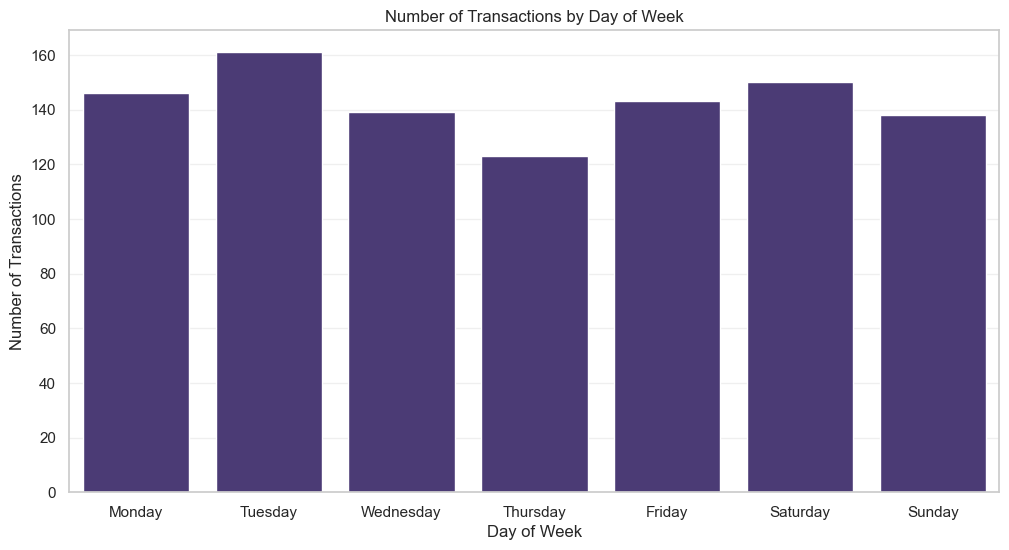

In [20]:
# Transactions by day of week
day_counts = sales_df['Day_Name'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
day_counts.columns = ['Day of Week', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Count', data=day_counts)
plt.title('Number of Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.3)
plt.show()


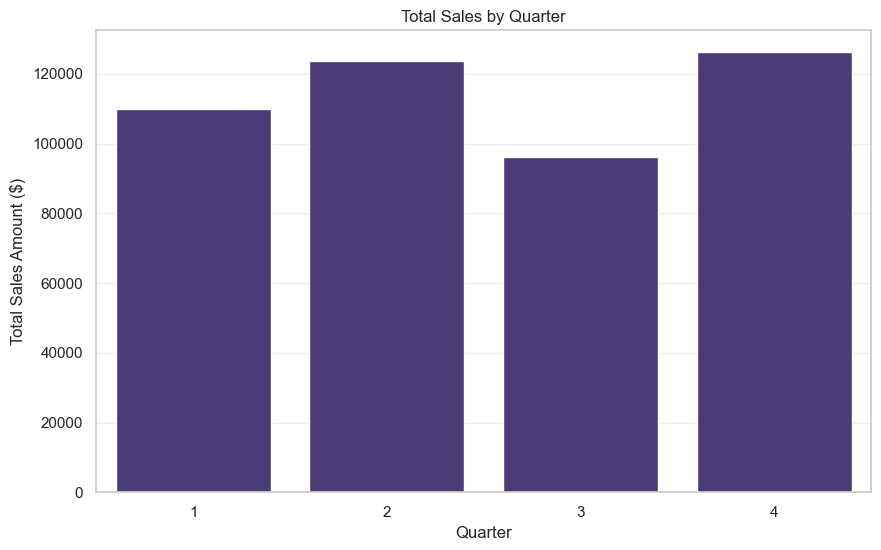

In [21]:
# Sales by quarter
quarterly_sales = sales_df.groupby('Quarter')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Total Amount', data=quarterly_sales)
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [ ]:
## 6. Product and Customer Analysis


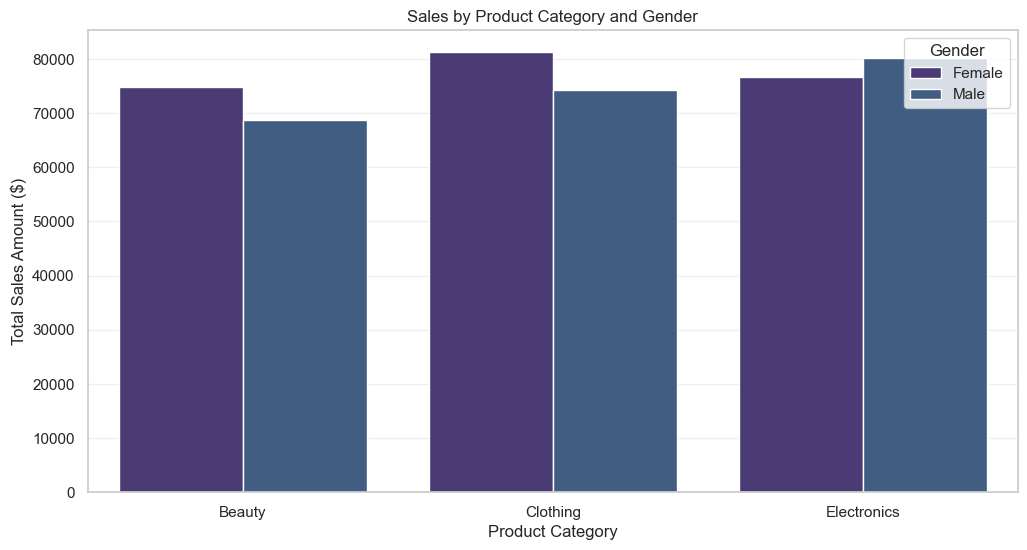

In [22]:
# Product category sales by gender
gender_category_sales = sales_df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=gender_category_sales)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount ($)')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Gender')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_2248\2414380014.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = sales_df.groupby('Age Group')['Total Amount'].mean().reset_index()


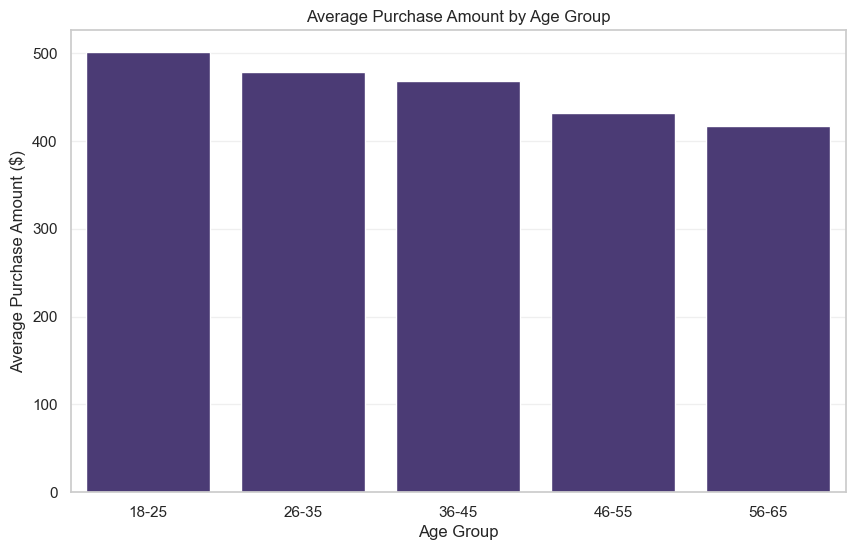

In [23]:
# Average purchase amount by age group
age_group_avg = sales_df.groupby('Age Group')['Total Amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Total Amount', data=age_group_avg)
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()


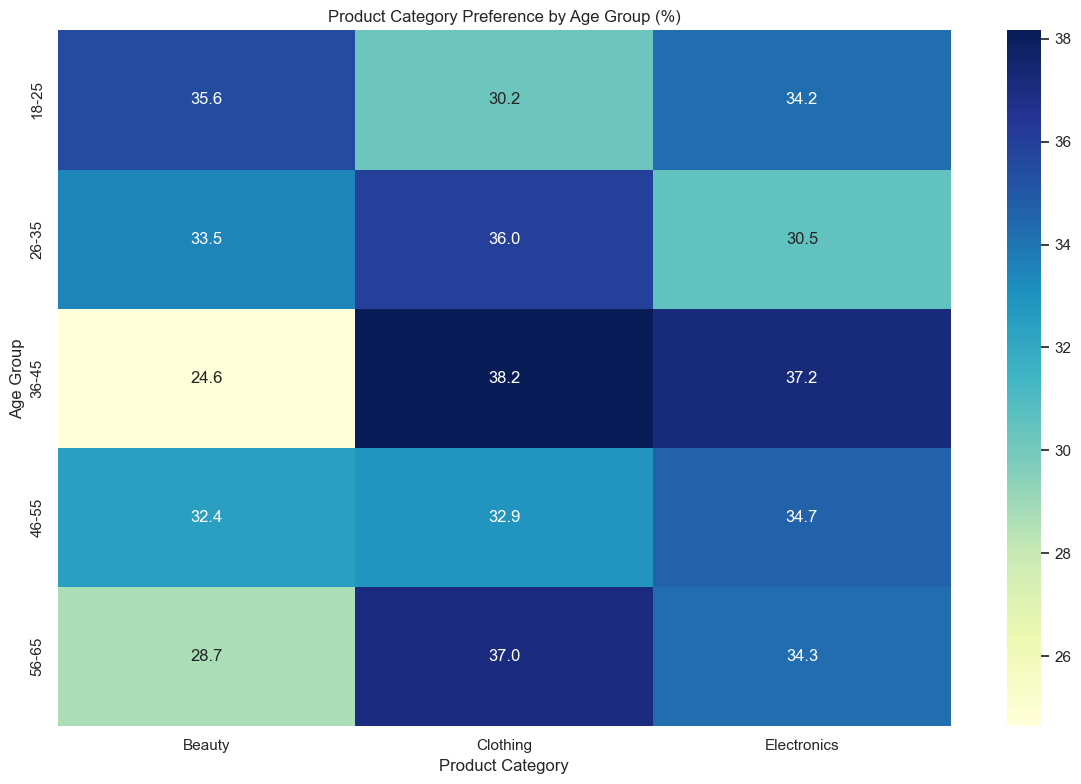

In [24]:
# Product preference by age group
age_category = pd.crosstab(sales_df['Age Group'], sales_df['Product Category'])
age_category_pct = age_category.div(age_category.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(age_category_pct, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Product Category Preference by Age Group (%)')
plt.ylabel('Age Group')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


In [ ]:
## 7. Correlation Analysis


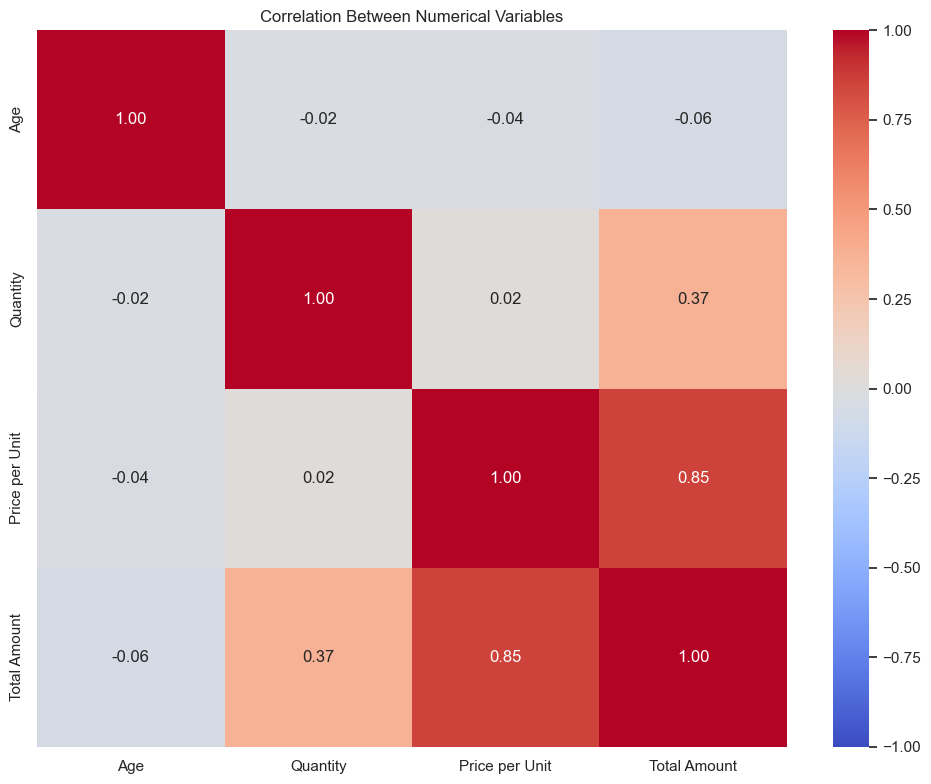

In [25]:
# Compute correlation between numerical variables
correlation = sales_df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Numerical Variables')
plt.tight_layout()
plt.show()


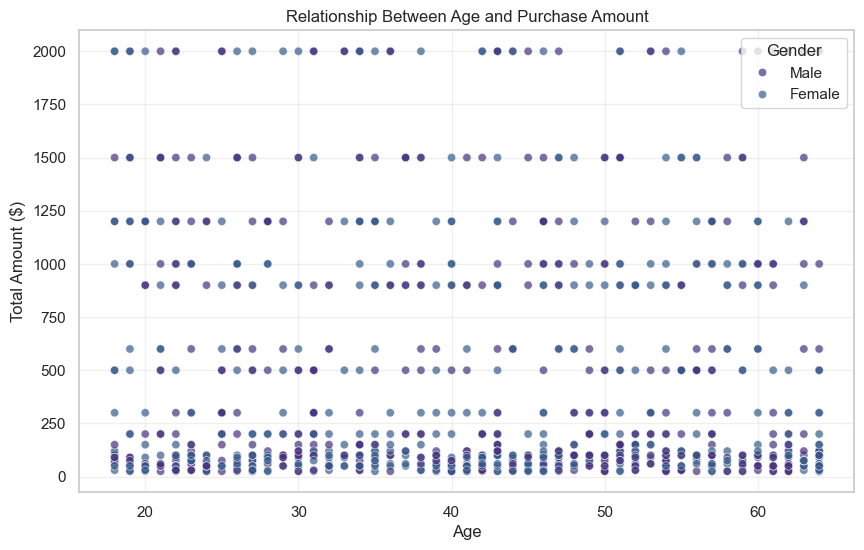

In [26]:
# Scatter plot of Age vs Total Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total Amount', hue='Gender', data=sales_df, alpha=0.7)
plt.title('Relationship Between Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount ($)')
plt.grid(True, alpha=0.3)
plt.legend(title='Gender')
plt.show()


In [ ]:
## 8. Price Analysis


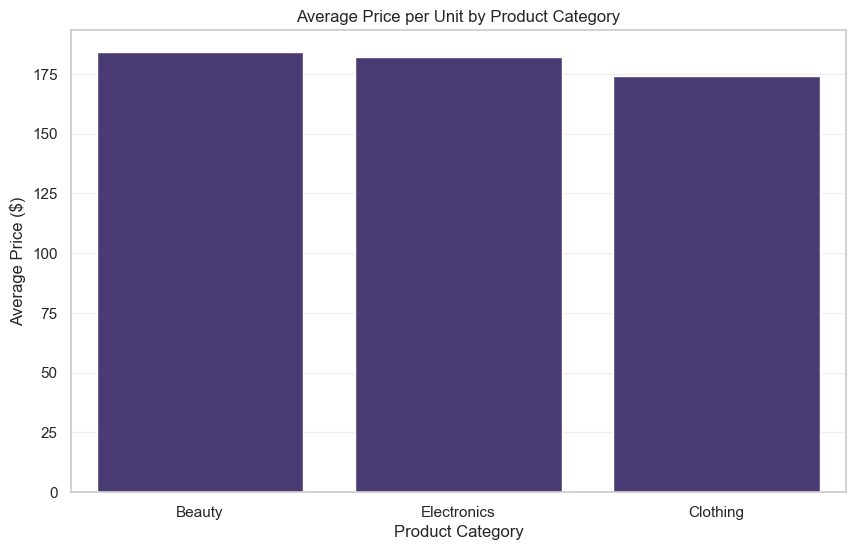

In [27]:
# Average price per unit by product category
avg_price = sales_df.groupby('Product Category')['Price per Unit'].mean().reset_index()
avg_price = avg_price.sort_values('Price per Unit', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Price per Unit', data=avg_price)
plt.title('Average Price per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price ($)')
plt.grid(axis='y', alpha=0.3)
plt.show()


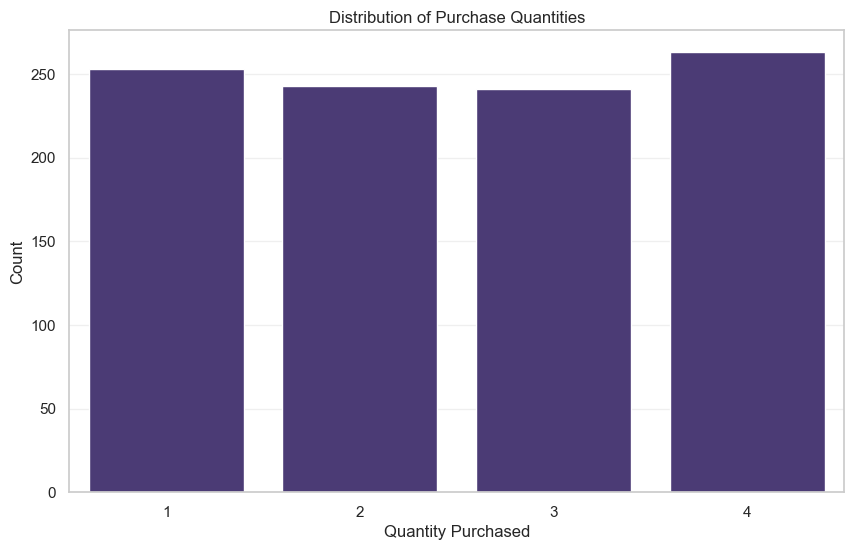

In [28]:
# Distribution of purchase quantities
plt.figure(figsize=(10, 6))
sns.countplot(x='Quantity', data=sales_df)
plt.title('Distribution of Purchase Quantities')
plt.xlabel('Quantity Purchased')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [ ]:
## 9. Key Findings and Insights


In [ ]:
After performing exploratory data analysis on our retail sales dataset, here are the key findings:

1. **Customer Demographics**:
   - Gender distribution shows a relatively balanced customer base
   - Age distribution reveals which age groups are most frequent shoppers
   - Different age groups show preference for different product categories

2. **Product Performance**:
   - Sales by product category highlight top-selling categories
   - Product preferences differ by gender and age group
   - Price points vary significantly across product categories

3. **Time-Based Patterns**:
   - Monthly sales trends show seasonal variations
   - Day of week analysis reveals busier shopping days
   - Quarterly analysis shows overall sales trends throughout the year

4. **Purchase Behavior**:
   - Quantity distribution shows common purchase amounts
   - Average purchase values differ across customer segments
   - Pricing strategy impacts appear in correlation analysis


In [ ]:
## 10. Recommendations


In [ ]:
Based on our exploratory data analysis, here are some actionable recommendations for the retail business:

1. **Targeted Marketing**:
   - Develop marketing campaigns specific to age groups and their product preferences
   - Consider gender-specific promotions for product categories with strong gender bias
   
2. **Inventory Management**:
   - Adjust inventory levels based on monthly and seasonal sales patterns
   - Ensure optimal stock levels for high-demand product categories
   
3. **Pricing Strategy**:
   - Review pricing for categories with lower sales volumes
   - Consider bundle offers for commonly purchased quantities
   
4. **Customer Experience**:
   - Allocate staff resources appropriately based on day-of-week traffic patterns
   - Develop loyalty programs targeting high-value customer segments
   
5. **Product Development**:
   - Explore opportunities to expand offerings in high-performing product categories
   - Consider new products targeting underserved age segments
   
6. **Seasonal Planning**:
   - Prepare promotional strategies for lower-performing quarters
   - Capitalize on peak sales seasons with special offerings
